In [1]:
import pandas as pd

# Read the Excel file
Table = pd.read_excel('2022-10-03 - Thirteen Year Guardian League Table.xlsx')




#DISPLAY THE DATAFRAME
print(Table)


      Year  Rank   Institution Satisfied with Course Satisfied with Teaching  \
0     2011    33      Aberdeen                    89                      89   
1     2012    45      Aberdeen                    88                      87   
2     2013    38      Aberdeen                    88                      88   
3     2014    43      Aberdeen             88.135593               86.516542   
4     2015    41      Aberdeen             87.951138               88.909696   
...    ...   ...           ...                   ...                     ...   
1551  2019   119  York St John             82.209167               84.653471   
1552  2020   107  York St John                  85.1                    85.9   
1553  2021    91  York St John                  85.6                    86.2   
1554  2022    84  York St John                  81.1                    83.6   
1555  2023    77  York St John                  77.9                    82.2   

     Satisfied with Feedback Student to

In [2]:
# Convert the satisfaction columns to numeric types
Table['Satisfied with Course'] = pd.to_numeric(Table['Satisfied with Course'], errors='coerce')
Table['Satisfied with Teaching'] = pd.to_numeric(Table['Satisfied with Teaching'], errors='coerce')
Table['Satisfied with Feedback'] = pd.to_numeric(Table['Satisfied with Feedback'], errors='coerce')


# Convert the Value Added Score and Spend per Student columns to numeric types
Table['Value Added Score'] = pd.to_numeric(Table['Value Added Score'], errors='coerce')
Table['Spend per Student'] = pd.to_numeric(Table['Spend per Student'], errors='coerce')


#convert Rank and Student to Staff Ratio columns to numeric types 
Table['Rank'] = pd.to_numeric(Table['Rank'], errors='coerce')
Table['Student to Staff Ratio'] = pd.to_numeric(Table['Student to Staff Ratio'], errors='coerce')




#print data frame
print(Table)


      Year  Rank   Institution  Satisfied with Course  \
0     2011    33      Aberdeen              89.000000   
1     2012    45      Aberdeen              88.000000   
2     2013    38      Aberdeen              88.000000   
3     2014    43      Aberdeen              88.135593   
4     2015    41      Aberdeen              87.951138   
...    ...   ...           ...                    ...   
1551  2019   119  York St John              82.209167   
1552  2020   107  York St John              85.100000   
1553  2021    91  York St John              85.600000   
1554  2022    84  York St John              81.100000   
1555  2023    77  York St John              77.900000   

      Satisfied with Teaching  Satisfied with Feedback  \
0                   89.000000                66.000000   
1                   87.000000                64.000000   
2                   88.000000                66.000000   
3                   86.516542                64.726808   
4                   88.90

In [3]:
# Define the total possible satisfaction score (e.g., out of 100)
total_satisfaction_score = 100

# Calculate the percentage of satisfaction with course, teaching, and feedback
Table['Course Satisfaction Percentage'] = (Table['Satisfied with Course'] / total_satisfaction_score) * 100
Table['Teaching Satisfaction Percentage'] = (Table['Satisfied with Teaching'] / total_satisfaction_score) * 100
Table['Feedback Satisfaction Percentage'] = (Table['Satisfied with Feedback'] / total_satisfaction_score) * 100




print(Table)



      Year  Rank   Institution  Satisfied with Course  \
0     2011    33      Aberdeen              89.000000   
1     2012    45      Aberdeen              88.000000   
2     2013    38      Aberdeen              88.000000   
3     2014    43      Aberdeen              88.135593   
4     2015    41      Aberdeen              87.951138   
...    ...   ...           ...                    ...   
1551  2019   119  York St John              82.209167   
1552  2020   107  York St John              85.100000   
1553  2021    91  York St John              85.600000   
1554  2022    84  York St John              81.100000   
1555  2023    77  York St John              77.900000   

      Satisfied with Teaching  Satisfied with Feedback  \
0                   89.000000                66.000000   
1                   87.000000                64.000000   
2                   88.000000                66.000000   
3                   86.516542                64.726808   
4                   88.90

In [4]:
# Calculate the average satisfaction score for each institution
Table['Average Satisfaction Score'] = (Table['Satisfied with Course'] + 
                                       Table['Satisfied with Teaching'] + 
                                       Table['Satisfied with Feedback']) / 3
print(Table)

      Year  Rank   Institution  Satisfied with Course  \
0     2011    33      Aberdeen              89.000000   
1     2012    45      Aberdeen              88.000000   
2     2013    38      Aberdeen              88.000000   
3     2014    43      Aberdeen              88.135593   
4     2015    41      Aberdeen              87.951138   
...    ...   ...           ...                    ...   
1551  2019   119  York St John              82.209167   
1552  2020   107  York St John              85.100000   
1553  2021    91  York St John              85.600000   
1554  2022    84  York St John              81.100000   
1555  2023    77  York St John              77.900000   

      Satisfied with Teaching  Satisfied with Feedback  \
0                   89.000000                66.000000   
1                   87.000000                64.000000   
2                   88.000000                66.000000   
3                   86.516542                64.726808   
4                   88.90

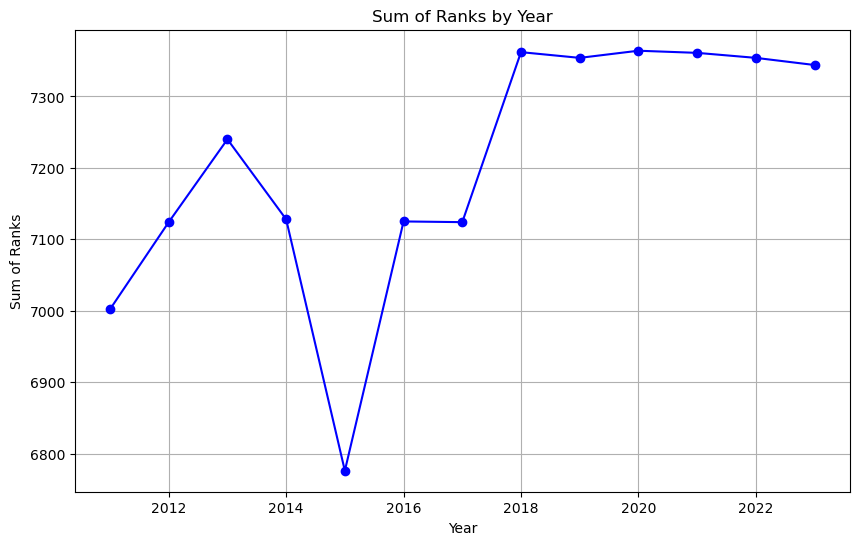

In [5]:

import matplotlib.pyplot as plt
# Group the data by year and calculate the sum of ranks for each year
sum_of_ranks_by_year = Table.groupby('Year')['Rank'].sum()

# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(sum_of_ranks_by_year.index, sum_of_ranks_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Sum of Ranks by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Ranks')
plt.grid(True)
plt.show()


In [6]:
# Convert DataFrame to CSV file
#Table.to_csv('New_Guardian_League.csv', index=False)

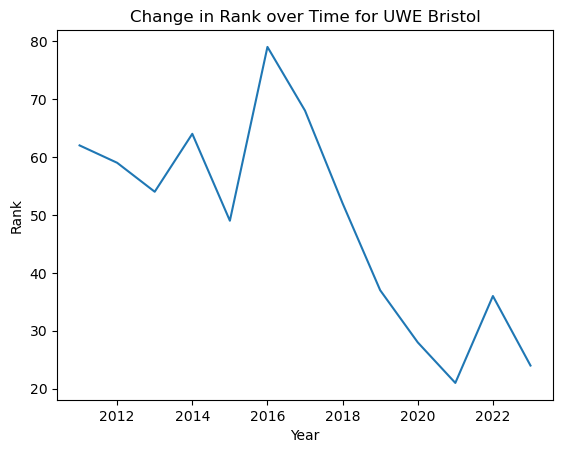

In [7]:
import matplotlib.pyplot as plt

# Line Chart: Change in Rank over Time for UWE Bristol
institution = 'UWE Bristol'  
institution_data = Table[Table['Institution'] == institution]
plt.plot(institution_data['Year'], institution_data['Rank'])

#plot the axis
plt.xlabel('Year')
plt.ylabel('Rank')

#add Title
plt.title(f'Change in Rank over Time for {institution}')

#plot the graph
plt.show()

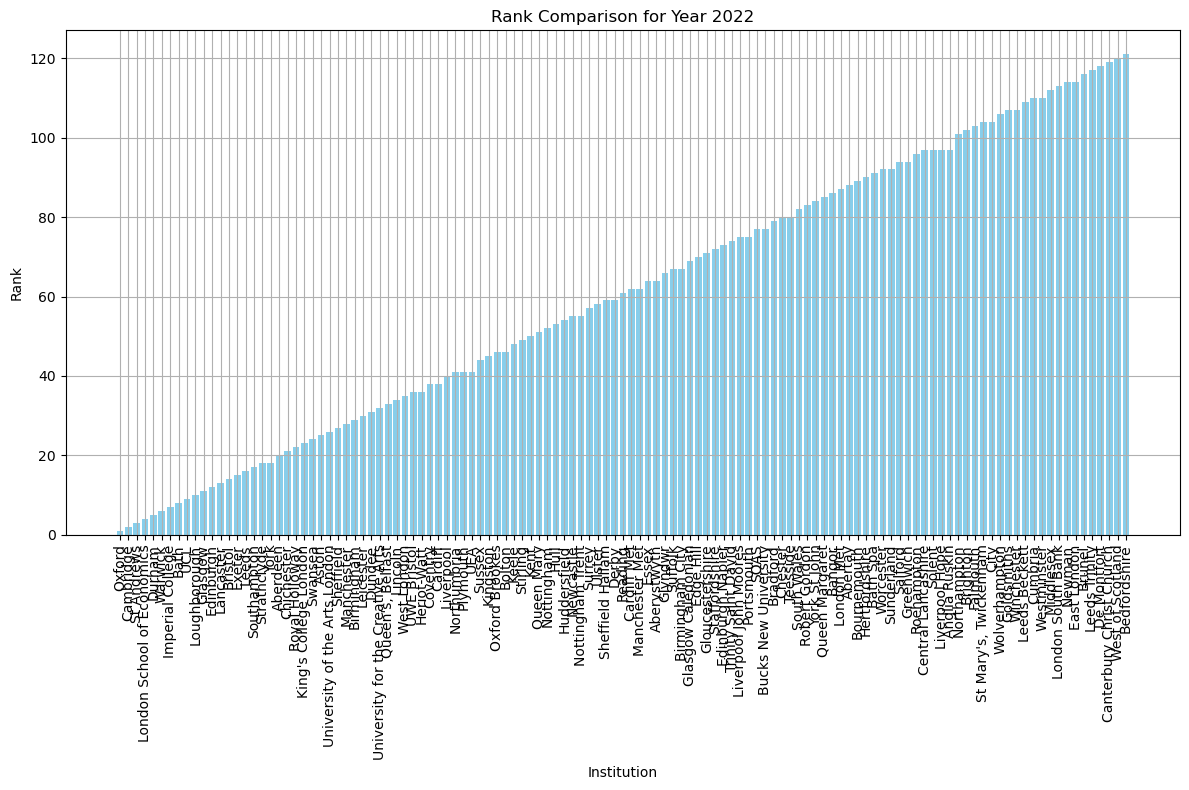

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# Choose the year for visualization
selected_year = 2022

# Filter data for the selected year
year_data = Table[Table['Year'] == selected_year]

# Sort data by rank
year_data = year_data.sort_values(by='Rank')

# Create a bar chart to compare rankings of different institutions
plt.figure(figsize=(12, 8))
plt.bar(year_data['Institution'], year_data['Rank'], color='skyblue')

# Add labels and title
plt.xlabel('Institution')
plt.ylabel('Rank')
plt.title(f'Rank Comparison for Year {selected_year}')
plt.xticks(rotation=90)
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()



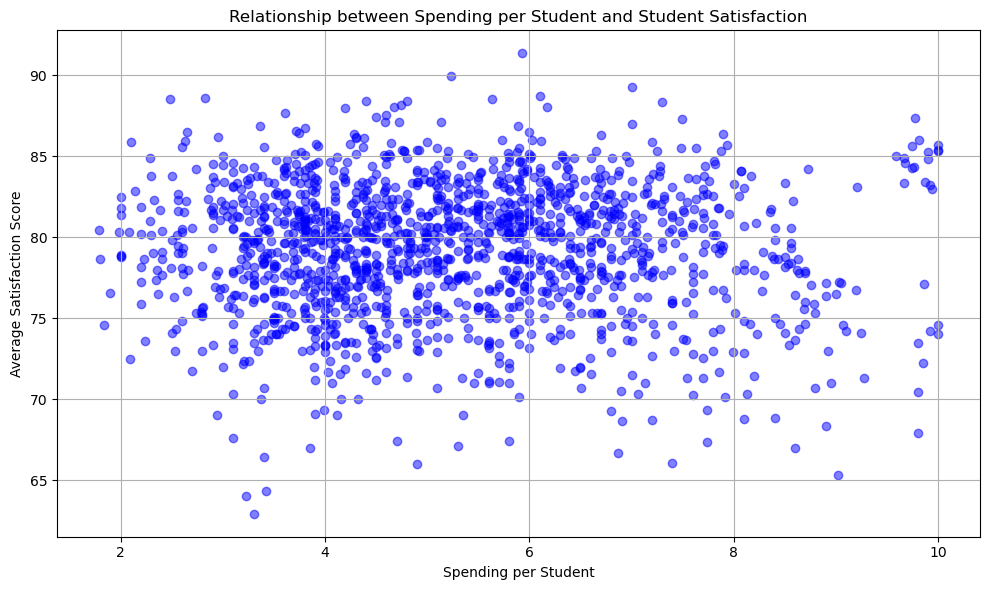

In [9]:


# Create a scatter plot to explore the relationship between spending per student and student satisfaction
plt.figure(figsize=(10, 6))
plt.scatter(Table['Spend per Student'], Table['Average Satisfaction Score'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Spending per Student')
plt.ylabel('Average Satisfaction Score')
plt.title('Relationship between Spending per Student and Student Satisfaction')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

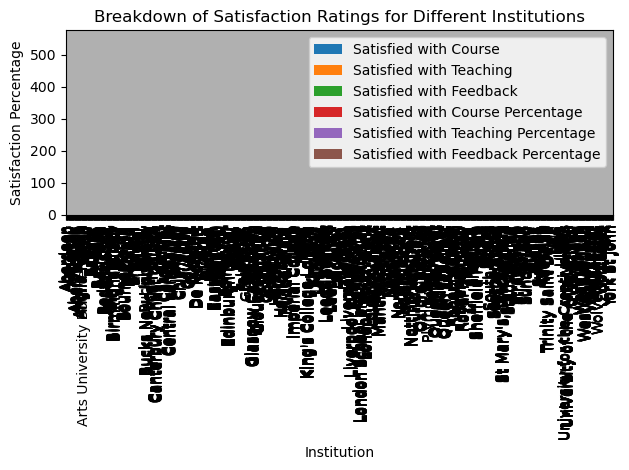

In [10]:


# Select the columns for satisfaction ratings and institution names
satisfaction_columns = ['Satisfied with Course', 'Satisfied with Teaching', 'Satisfied with Feedback']
institution_column = 'Institution'

# Calculate the percentage for each satisfaction rating
for col in satisfaction_columns:
    Table[col + ' Percentage'] = (Table[col] / 100) * 100  # Assuming the satisfaction columns are in percentage

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
Table.set_index(institution_column)[satisfaction_columns + [col + ' Percentage' for col in satisfaction_columns]].plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Institution')
plt.ylabel('Satisfaction Percentage')
plt.title('Breakdown of Satisfaction Ratings for Different Institutions')
plt.legend(loc='upper right')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

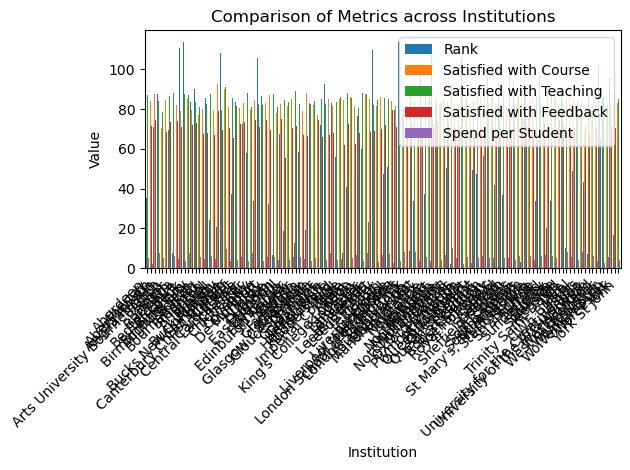

In [11]:

# Select the columns for analysis
metrics_columns = ['Rank', 'Satisfied with Course', 'Satisfied with Teaching', 
                   'Satisfied with Feedback', 'Spend per Student']

# Group the data by institution and calculate mean values for each metric
grouped_data = Table.groupby('Institution')[metrics_columns].mean()

# Plot a grouped bar chart
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', width=0.8)
plt.title('Comparison of Metrics across Institutions')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

# Show the chart
plt.show()


<Figure size 1000x600 with 0 Axes>

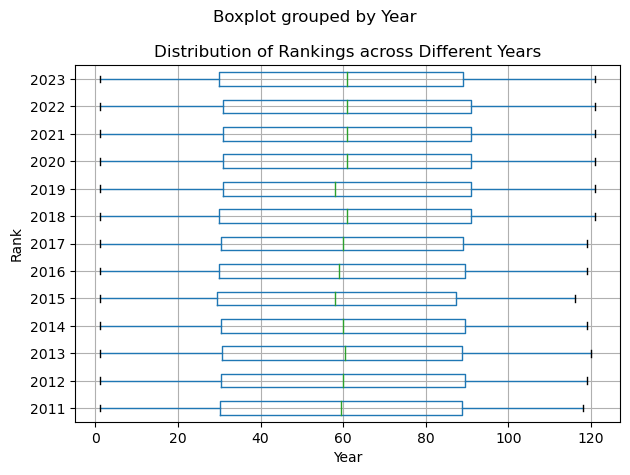

In [12]:


# Plot a box plot
plt.figure(figsize=(10, 6))
Table.boxplot(column='Rank', by='Year', vert=False)
plt.title('Distribution of Rankings across Different Years')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.tight_layout()

# Show the chart
plt.show()


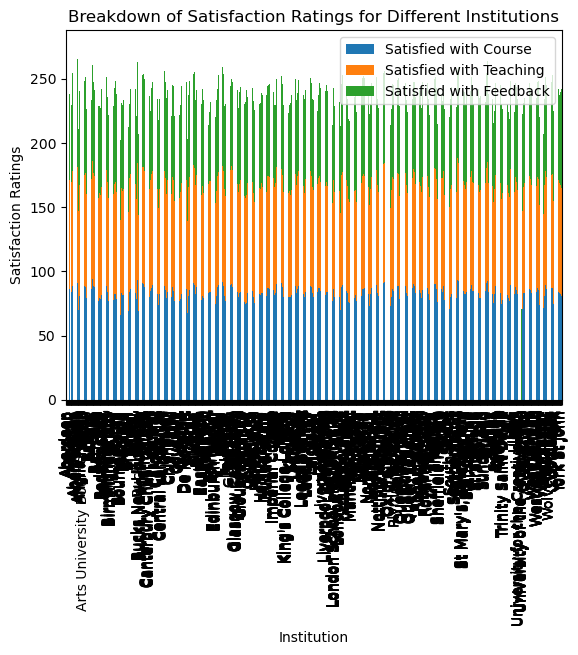

In [13]:
# Stacked Bar Chart: Breakdown of satisfaction ratings for different institutions
satisfaction_columns = ['Satisfied with Course', 'Satisfied with Teaching', 'Satisfied with Feedback']
satisfaction_data = Table[['Institution'] + satisfaction_columns]
satisfaction_data.set_index('Institution').plot(kind='bar', stacked=True)
plt.xlabel('Institution')
plt.ylabel('Satisfaction Ratings')
plt.title('Breakdown of Satisfaction Ratings for Different Institutions')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

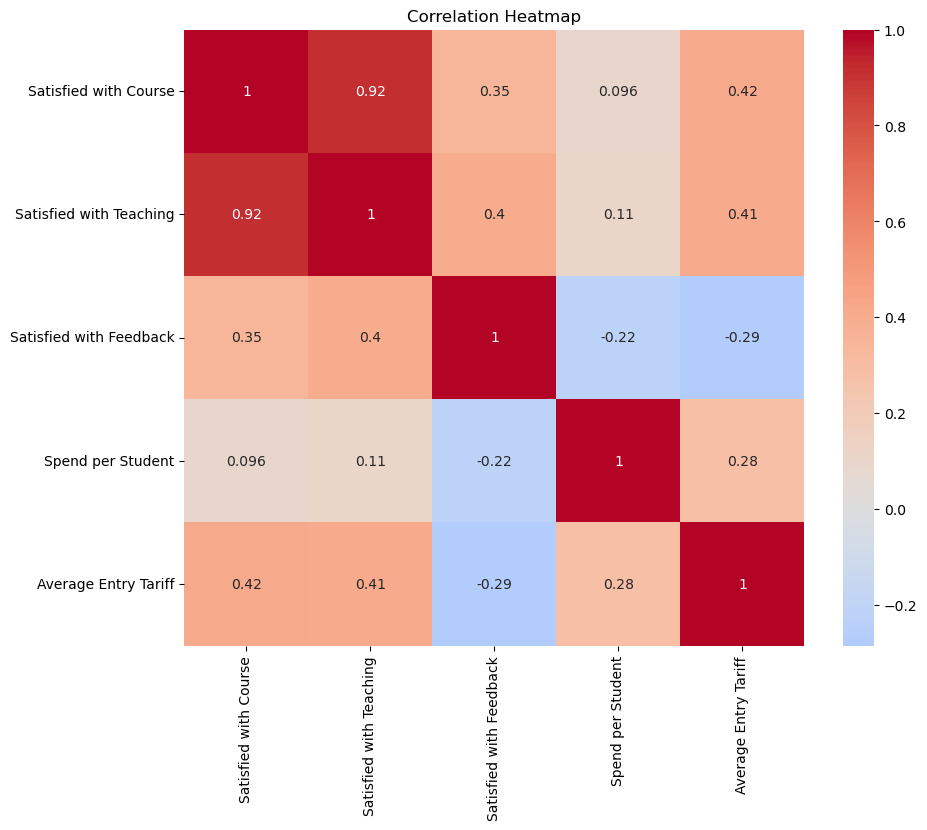

In [14]:
import seaborn as sns


# Select the columns for analysis
columns_for_correlation = ['Satisfied with Course', 'Satisfied with Teaching', 
                           'Satisfied with Feedback', 'Spend per Student', 
                           'Average Entry Tariff']

# Calculate the correlation matrix
correlation_matrix = Table[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()


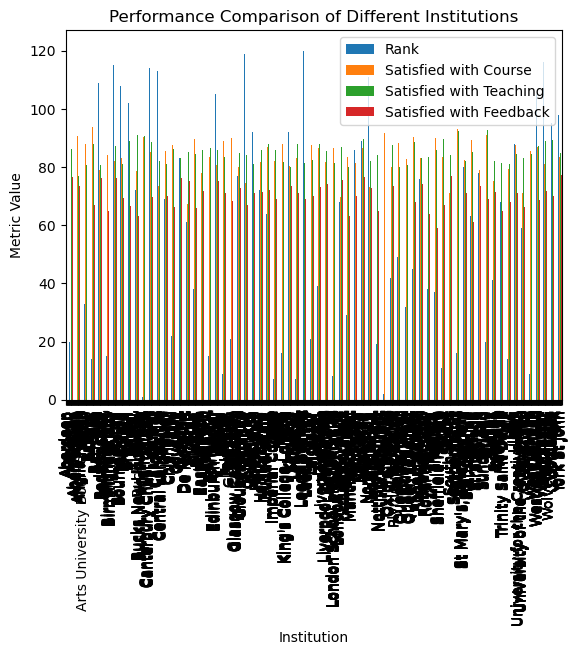

In [15]:
# Grouped Bar Chart: Performance comparison of different institutions across multiple metrics
metrics_columns = ['Rank', 'Satisfied with Course', 'Satisfied with Teaching', 'Satisfied with Feedback']
metrics_data = Table[['Institution'] + metrics_columns]
metrics_data.set_index('Institution').plot(kind='bar')
plt.xlabel('Institution')
plt.ylabel('Metric Value')
plt.title('Performance Comparison of Different Institutions')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [16]:
# Calculate summary statistics
summary_stats = Table[['Satisfied with Course', 'Satisfied with Teaching', 
                       'Satisfied with Feedback', 'Spend per Student', 'Average Entry Tariff']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Satisfied with Course  Satisfied with Teaching  \
count            1540.000000              1540.000000   
mean               82.939388                84.739361   
std                 5.376136                 4.038815   
min                57.100000                69.500000   
25%                80.000000                82.000000   
50%                83.661869                85.000000   
75%                87.000000                87.726035   
max                94.875000                95.474407   

       Satisfied with Feedback  Spend per Student  Average Entry Tariff  
count              1539.000000        1545.000000           1555.000000  
mean                 69.890424           5.280679            246.785922  
std                   5.370721           1.729677            120.914698  
min                  46.000000           1.787314             92.433198  
25%                  66.659495           3.917785            130.532158  
50%                  7

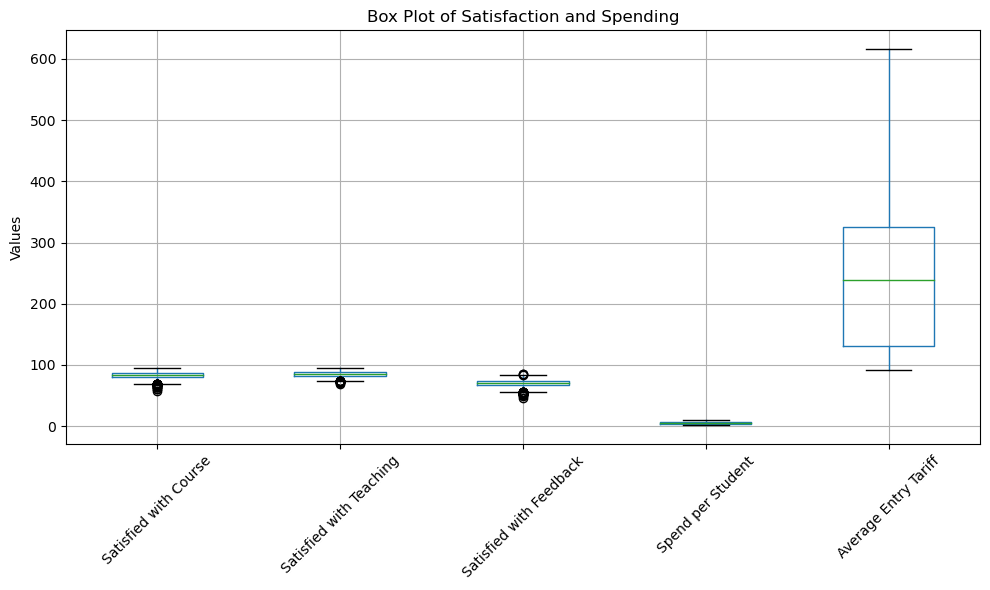

In [17]:
# Create a box plot
plt.figure(figsize=(10, 6))
Table[['Satisfied with Course', 'Satisfied with Teaching', 
       'Satisfied with Feedback', 'Spend per Student', 'Average Entry Tariff']].boxplot()
plt.title('Box Plot of Satisfaction and Spending')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


In [18]:
# Analyze the distribution of rankings
rank_distribution = Table.groupby('Year')['Rank'].describe()
print("\nRank Distribution:")
print(rank_distribution)


Rank Distribution:
      count       mean        std  min    25%   50%    75%    max
Year                                                             
2011  118.0  59.338983  34.226800  1.0  30.25  59.5  88.75  118.0
2012  119.0  59.865546  34.443745  1.0  30.50  60.0  89.50  119.0
2013  120.0  60.333333  34.757584  1.0  30.75  60.5  88.75  120.0
2014  119.0  59.899160  34.455423  1.0  30.50  60.0  89.50  119.0
2015  116.0  58.413793  33.620146  1.0  29.50  58.0  87.25  116.0
2016  119.0  59.873950  34.527453  1.0  30.00  59.0  89.50  119.0
2017  119.0  59.865546  34.485793  1.0  30.50  60.0  89.00  119.0
2018  121.0  60.842975  35.106032  1.0  30.00  61.0  91.00  121.0
2019  121.0  60.776860  35.026059  1.0  31.00  58.0  91.00  121.0
2020  121.0  60.859504  35.050037  1.0  31.00  61.0  91.00  121.0
2021  121.0  60.834711  35.059318  1.0  31.00  61.0  91.00  121.0
2022  121.0  60.776860  34.983922  1.0  31.00  61.0  91.00  121.0
2023  121.0  60.694215  35.012341  1.0  30.00  61.0  89.

In [19]:
# Perform correlation analysis
correlation_matrix = Table[['Satisfied with Course', 'Satisfied with Teaching', 
                            'Satisfied with Feedback', 'Spend per Student', 
                            'Average Entry Tariff', 'Value Added Score', 
                            'Career after 15 months', 'Continuation', 'Guardian Score']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                         Satisfied with Course  Satisfied with Teaching  \
Satisfied with Course                 1.000000                 0.917450   
Satisfied with Teaching               0.917450                 1.000000   
Satisfied with Feedback               0.351348                 0.402827   
Spend per Student                     0.095881                 0.110091   
Average Entry Tariff                  0.420591                 0.411164   
Value Added Score                     0.127529                 0.108196   
Career after 15 months                0.209299                 0.194697   
Continuation                          0.149741                 0.085743   
Guardian Score                        0.382123                 0.385250   

                         Satisfied with Feedback  Spend per Student  \
Satisfied with Course                   0.351348           0.095881   
Satisfied with Teaching                 0.402827           0.110091   
Satisfied with 

In [20]:
# Perform time series analysis
time_series_analysis = Table.groupby(['Institution', 'Year'])['Rank'].mean().unstack()
print("\nTime Series Analysis (Average Rank by Institution):")
print(time_series_analysis)


Time Series Analysis (Average Rank by Institution):
Year                          2011   2012   2013   2014   2015   2016   2017  \
Institution                                                                    
Aberdeen                      33.0   45.0   38.0   43.0   41.0   41.0   36.0   
Abertay                      110.0  106.0  119.0  114.0  101.0   93.0   85.0   
Aberystwyth                   49.0   50.0   81.0   88.0  106.0  110.0  108.0   
Anglia Ruskin                 84.0   91.0   77.0   67.0  105.0   88.0   66.0   
Arts University Bournemouth    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                            ...    ...    ...    ...    ...    ...    ...   
Winchester                    96.0   69.0   87.0   66.0   59.0   75.0   63.0   
Wolverhampton                  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Worcester                     92.0  105.0   98.0   95.0  103.0  108.0   95.0   
York                           9.0   15.0   17.0   16.0   16.0   22

In [21]:
# Perform group comparisons
group_comparisons = Table.groupby('Institution')[['Rank', 'Satisfied with Course', 
                                                  'Satisfied with Teaching', 'Satisfied with Feedback']].mean()
print("\nGroup Comparisons:")
print(group_comparisons)


Group Comparisons:
                                   Rank  Satisfied with Course  \
Institution                                                      
Aberdeen                      35.461538              86.950845   
Abertay                       90.000000              84.075015   
Aberystwyth                   71.153846              87.829710   
Anglia Ruskin                 87.538462              79.687413   
Arts University Bournemouth   70.000000              70.500000   
...                                 ...                    ...   
Winchester                    84.923077              83.534729   
Wolverhampton                111.000000              78.635276   
Worcester                     95.692308              82.765078   
York                          16.769231              86.176339   
York St John                  98.076923              82.864038   

                             Satisfied with Teaching  Satisfied with Feedback  
Institution                              